In [22]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [23]:
# only during train
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [24]:
# only during test or inference
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [25]:
# for cnn
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
#other 
import os
import itertools
import shutil
import random 
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib

Using matplotlib backend: agg


In [27]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [8]:
train_labels = []
train_samples = []

In [9]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)


for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)


In [ ]:
for i in train_samples:
  print(i)

In [ ]:
for i in train_labels:
  print(i)

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [ ]:
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
  print(i)

# Always specify input_shape parameter for first layer

In [ ]:
model = Sequential([Dense(units=16, input_shape = (1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
                    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split= 0.1 ,batch_size=10, epochs= 30, shuffle= True, verbose=2)

In [ ]:
test_labels =[]
test_samples = []

In [ ]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)


for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)


In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# predict from model

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
  print(i)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)

In [ ]:
for i in rounded_predictions:
  print(i)

# Confusion matrix if we labels available
use sklearn

In [28]:
%matplotlib inline
from sklearn.metrics import confusion_matrix 
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true= test_labels, y_pred= rounded_predictions)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


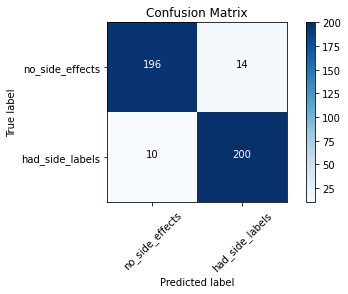

In [ ]:
cm_plot_labels = ['no_side_effects', 'had_side_labels']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Save and load a model

1. model.save() -> path with h5 extension , It saves
- the architecture of the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off

In [ ]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

In [ ]:
from tensorflow.keras import load_model
new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

# 2. model.to_json() , it saves
- only the architecture of the model and not its weights or its training configuration, you can use the following function to save architecture only

In [ ]:
# save as json 
json_string = model.to_json()

In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#3. model.to_yaml(), it saves


In [ ]:
# save as yaml 
yaml_string = model.to_yaml()

In [ ]:
yaml_string

In [ ]:
from tensorflow.keras.models import model_from_yaml
model_yaml = model_from_yaml(yaml_string)

In [ ]:
model_yaml.summary()

# 4. model.save_weights() , it saves
- only weights of the model, you can use the following function to save the weights only.
- create a model with same architecture , for which weights are saved.

In [ ]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
  model.save('models/my_model_weights.h5')

In [ ]:
model2 = Sequential([Dense(units=16, input_shape = (1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
                    ])

In [ ]:
model2.load_weights('models/my_model_weights.h5')

In [ ]:
model2.get_weights()

# IMAGE PREPARATION FOR CONVOLUTIONAL NEURAL NETWORKS

In [9]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
Path = "/content/drive/My Drive/train"

#Data Preparation

In [ ]:
# organise images in train, test and valid test
for c in random.sample(glob.glob('cat*'), 500):
  shutil.move(c, '/content/drive/My Drive/train/cat')

In [53]:
train_path = "/content/drive/My Drive/train/dog"
test_path = "/content/drive/My Drive/test"
valid_path = "/content/drive/My Drive/valid"

In [16]:
train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory = train_path, target_size = (224,224), classes = ['cat','dog'], batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory = valid_path, target_size = (224,224), classes = ['cat','dog'], batch_size = 10)

test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory = test_path, target_size = (224,224), classes = ['cat','dog'], batch_size = 10, shuffle = False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [17]:
img, labels = next(train_batches)

In [51]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

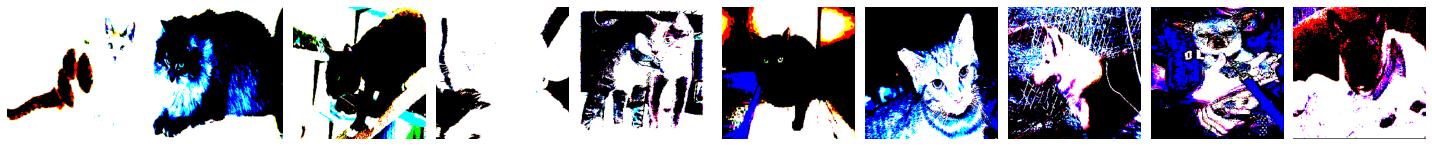

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [19]:
plotImages(img)
print(labels)

#Code update for CNN Training with tensorflow

In [ ]:
# steps per epoch , validation_steps 
# specify steps during inference



#Build and train a CNN

In [20]:
model = Sequential([
                    Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Flatten(),
                    Dense(units=2, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

#For Training

In [22]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

We do not need to specify y labels because when we use generator , it already contains labels as well.

In [23]:
model.fit(x=train_batches, validation_data= valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 683s - loss: 57.8186 - accuracy: 0.5130 - val_loss: 0.6939 - val_accuracy: 0.5150
Epoch 2/10
100/100 - 7s - loss: 0.6812 - accuracy: 0.5660 - val_loss: 0.6857 - val_accuracy: 0.5600
Epoch 3/10
100/100 - 6s - loss: 0.6392 - accuracy: 0.6350 - val_loss: 0.6889 - val_accuracy: 0.6050
Epoch 4/10
100/100 - 6s - loss: 0.4793 - accuracy: 0.7750 - val_loss: 0.7196 - val_accuracy: 0.5700
Epoch 5/10
100/100 - 7s - loss: 0.3151 - accuracy: 0.8890 - val_loss: 0.8699 - val_accuracy: 0.6100
Epoch 6/10
100/100 - 6s - loss: 0.1594 - accuracy: 0.9470 - val_loss: 1.0578 - val_accuracy: 0.6200
Epoch 7/10
100/100 - 6s - loss: 0.0921 - accuracy: 0.9740 - val_loss: 1.3087 - val_accuracy: 0.6200
Epoch 8/10
100/100 - 6s - loss: 0.0624 - accuracy: 0.9870 - val_loss: 1.4636 - val_accuracy: 0.5850
Epoch 9/10
100/100 - 6s - loss: 0.0254 - accuracy: 0.9950 - val_loss: 1.7584 - val_accuracy: 0.6000
Epoch 10/10
100/100 - 6s - loss: 0.0117 - accuracy: 0.9980 - val_loss: 1.9471 - val_accuracy: 0.6

#Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

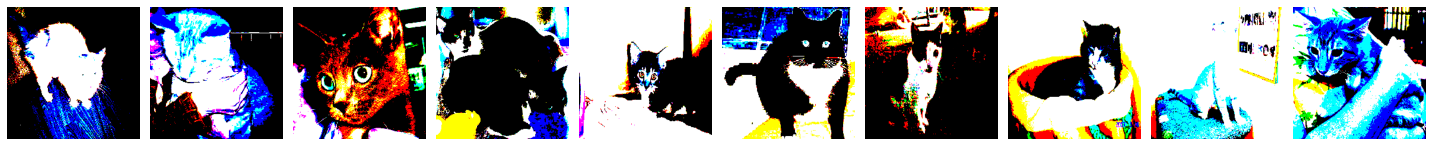

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [25]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [26]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
prediction = model.predict(x=test_batches, verbose=0)

In [28]:
np.round(prediction)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [29]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(prediction, axis=1))

In [30]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[22 28]
 [18 32]]


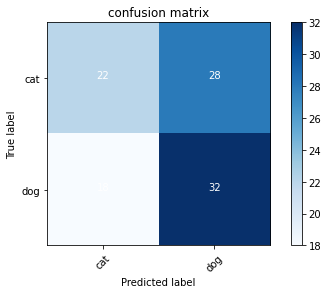

In [31]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

# Build a fine-tuned NN with keras API

In [32]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 9s 0us/step


In [33]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [38]:
for layer in model.layers:
  layer.trainable = False

In [39]:
model.add(Dense(units=2, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

#Train a fine-tuned Neural network

In [68]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 19s - loss: 0.2186 - accuracy: 0.9100 - val_loss: 0.0885 - val_accuracy: 0.9700
Epoch 2/5
100/100 - 15s - loss: 0.0810 - accuracy: 0.9720 - val_loss: 0.0676 - val_accuracy: 0.9750
Epoch 3/5
100/100 - 15s - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.0603 - val_accuracy: 0.9850
Epoch 4/5
100/100 - 15s - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.0630 - val_accuracy: 0.9850
Epoch 5/5
100/100 - 15s - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0625 - val_accuracy: 0.9800


#Predict with a fine tuned neuraal network

In [43]:
prediction = model.predict(x=test_batches, verbose=0)

In [44]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [46]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred= np.argmax(prediction, axis=1))

In [47]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[50  0]
 [ 0 50]]


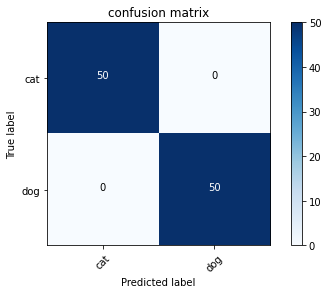

In [48]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes= cm_plot_labels, title='confusion matrix')

#Fine Tune on dataset which was earlier not included in pretrained dataset. MobileNet

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image


In [13]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [14]:
def prepare_image(file):
  img_path = "/content/drive/My Drive/MobileNet-samples/"
  img = image.load_img(img_path+file, target_size=(224,224)) # take the image and resize it to (224,224) because this is the size which imagenet expects
  img_array = image.img_to_array(img) 
  img_array_expand_dims = np.expand_dims(img_array, axis=0)
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expand_dims)

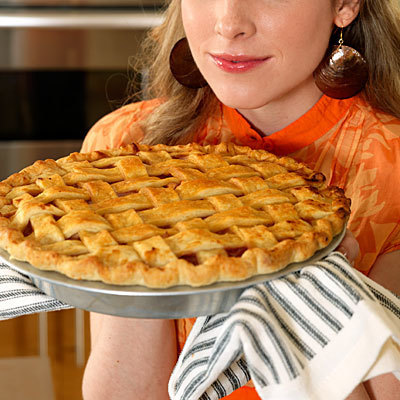

In [15]:
from IPython.display import Image
Image(filename = "/content/drive/My Drive/MobileNet-samples/apple_pie_1.jpg", width = 300, height = 200)

In [16]:
preprocessed_image = prepare_image("apple_pie_1.jpg")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

49152/35363 [=========================================] - 0s 0us/step


[[('n07873807', 'pizza', 0.41210106),
  ('n04270147', 'spatula', 0.08718236),
  ('n01981276', 'king_crab', 0.07653406),
  ('n07875152', 'potpie', 0.07451629),
  ('n07753275', 'pineapple', 0.052662678)]]

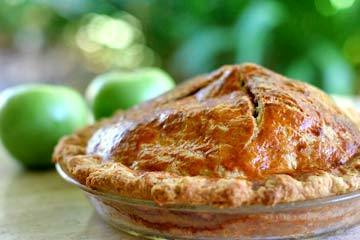

In [18]:
from IPython.display import Image
Image(filename = "/content/drive/My Drive/MobileNet-samples/apple_pie_2.jpg", width = 300, height = 200)

In [19]:
preprocessed_image = prepare_image("apple_pie_2.jpg")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07871810', 'meat_loaf', 0.47888657),
  ('n07875152', 'potpie', 0.16870098),
  ('n07684084', 'French_loaf', 0.11626161),
  ('n01753488', 'horned_viper', 0.040207762),
  ('n07714571', 'head_cabbage', 0.031319156)]]

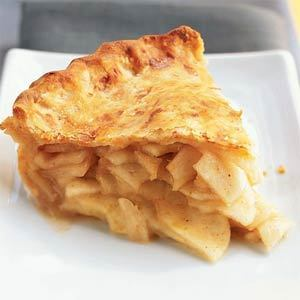

In [20]:
from IPython.display import Image
Image(filename = "/content/drive/My Drive/MobileNet-samples/apple_pie_5.jpg", width = 300, height = 200)

In [21]:
preprocessed_image = prepare_image("apple_pie_5.jpg")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07875152', 'potpie', 0.69602954),
  ('n07684084', 'French_loaf', 0.13986208),
  ('n07579787', 'plate', 0.06465513),
  ('n07714571', 'head_cabbage', 0.041806083),
  ('n07716906', 'spaghetti_squash', 0.012373905)]]

#Process Images for finetuned mobilenet

In [33]:
train_path = "/content/drive/My Drive/Sign-Language-Digits-Dataset/Train"
test_path = "/content/drive/My Drive/Sign-Language-Digits-Dataset/Test"
valid_path = "/content/drive/My Drive/Sign-Language-Digits-Dataset/Valid"

In [35]:
train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory( directory = train_path , target_size=(224,224), batch_size =10)
valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory( directory = valid_path , target_size=(224,224), batch_size =10)
test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory( directory = test_path , target_size=(224,224), batch_size =10, shuffle = False)

Found 1713 images belonging to 10 classes.
Found 309 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


#Fine-Tuning MobileNet on custom dataset 

In [36]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [37]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [39]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x) # functional model not sequential

In [40]:
model = Model(inputs= mobile.input, outputs = output ) # functional model if specified in this way

In [42]:
for layer in model.layers[:23]:
  layer.trainable = False

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

#Train the model

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
172/172 - 476s - loss: 0.5291 - accuracy: 0.8511 - val_loss: 0.6386 - val_accuracy: 0.7799
Epoch 2/10
172/172 - 12s - loss: 0.0426 - accuracy: 0.9953 - val_loss: 0.3614 - val_accuracy: 0.8997
Epoch 3/10
172/172 - 12s - loss: 0.0207 - accuracy: 0.9982 - val_loss: 0.2557 - val_accuracy: 0.9385
Epoch 4/10
172/172 - 12s - loss: 0.0142 - accuracy: 0.9982 - val_loss: 0.2521 - val_accuracy: 0.9385
Epoch 5/10
172/172 - 12s - loss: 0.0094 - accuracy: 0.9994 - val_loss: 0.2156 - val_accuracy: 0.9288
Epoch 6/10
172/172 - 12s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1967 - val_accuracy: 0.9417
Epoch 7/10
172/172 - 12s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1817 - val_accuracy: 0.9482
Epoch 8/10
172/172 - 12s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1723 - val_accuracy: 0.9579
Epoch 9/10
172/172 - 12s - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.1522 - val_accuracy: 0.9547
Epoch 10/10
172/172 - 12s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1535 - val_accur

#Predict Sign Language

In [46]:
test_labels = test_batches.classes

In [47]:
predictions = model.predict(x= test_batches, verbose=0)

In [48]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [49]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


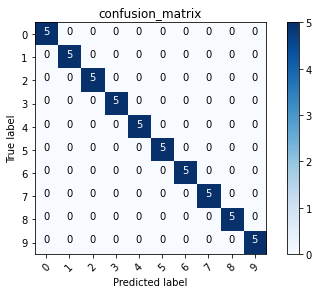

In [50]:
cm_plot_labels =['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

#DATA Augmentation:
Data augmentation when we create new data by create data by modifying the existing data.

In [52]:
gen = ImageDataGenerator( rotation_range=10, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10, horizontal_flip=True)

In [54]:
chosen_image = random.choice("/content/drive/My Drive/train/dog")

In [61]:
image_path = "/content/drive/My Drive/train/dog/" + "dog.35.jpg"

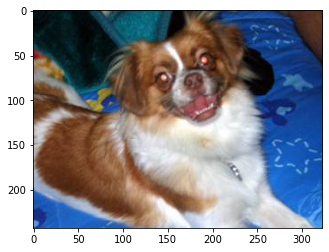

In [62]:
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [63]:
aug_itr = gen.flow(image)

In [65]:
aug_images = [next(aug_itr)[0].astype(np.uint8) for i in range(10)]

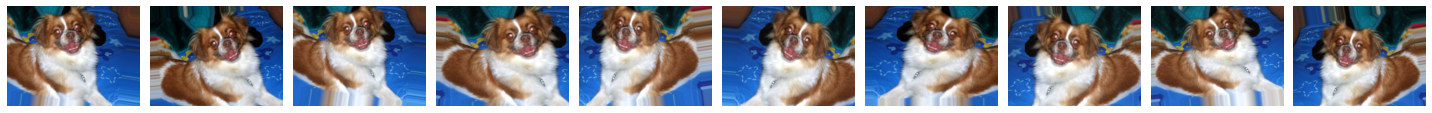

In [66]:
plotImages(aug_images)